In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

from collections import deque
#from progress.bar import Bar

from dwave.system.samplers import DWaveSampler
from chimera import Chimera
import chimera_visualizer as vs
from dwave.cloud import Client
import send_to_SA as sim
import create_training_data as tdata

In [3]:
def sampler():
    """Randomly chooses a value from the 16-bit possible values for
    weights and biases.

    There are in total 17 possible values, but since we are sampling
    based on non-zero values, there are only 16 in this sampler.
    """
    values = [
        -1.0, -0.875, -0.75, -0.625, -0.5, -0.375, -0.25, -0.125,
        +0.125, +0.25, +0.375, +0.5, +0.625, +0.75, +0.875, +1.0,
    ]

    indx = np.random.randint(0, 15)

    return values[indx]

In [4]:
chimera = Chimera()
Dsampler = DWaveSampler()
C = chimera.create_graph(
                             rows=1,
                             columns=2,
                             r=np.random.power(17),
                             bias_sampler=sampler,
                             edge_sampler=sampler,
                             connected=True,
                             )


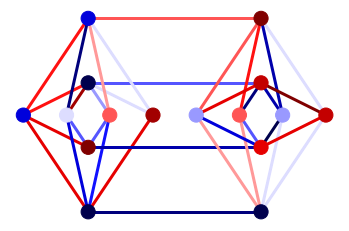

In [5]:
chimera.draw_block(C)

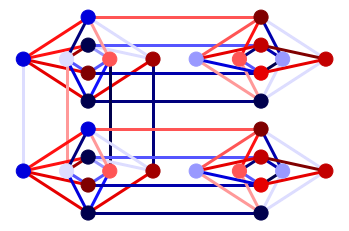

In [6]:
B = chimera.replicate(C,2,1, connector_sampler=sampler)
vs.draw_chimera(B[0],B[1], legend=0)

In [2]:
tdata.create_data(5,1,1)

In [ ]:
import dimod
# h = {0: 0.0, 1: 0.0}
# J = {(0, 1): -1.0}
bqm = dimod.BinaryQuadraticModel.from_ising(h, J)
response = dimod.ExactSolver().sample(bqm)
min_ene = float('inf')
for sample, energy in response.data(['sample', 'energy']):
    if energy<min_ene:
        min_ene = energy
print(min_ene)

In [ ]:
PTTS= np.percentile(test_arr,[25,50,75], axis=0)

In [ ]:
plt.plot(PTTS[2])

In [ ]:
test_arrD=np.zeros([100,10])
for i in range(100):
    C = chimera.replicate(B[0],B[1],1,16,connector_sampler=sampler)
    h = C[0].copy()
    J = C[1].copy()
    for (n1,n2) in C[1].keys():
        if (n1,n2) not in Dsampler.edgelist:
            J.pop((n1,n2))
    for n1 in C[0].keys():
        if n1 not in Dsampler.nodelist:
            h.pop(n1)
    a_time = 1
    print("Prob:", i)
    for j in range(10):
        test_arrD[i][j]=TTS_DWave(h, J, annealing=a_time)
        a_time = a_time + 2
        print(test_arrD[i][j])

In [ ]:
test_arrD

In [ ]:
A= np.array([[ 12.12533486,  29.9014075 ,  58.14462735,  85.20509217,
        121.01519544, 141.45833646, 180.71172593, 140.21391705,
        183.03935356, 164.77130957],
       [  1.11366014,   2.70045385,   4.76892186,   6.30105897,
          8.35304823,   9.17454145,  11.29928773,  13.50226923,
         15.77797999,  12.66666667],
       [  3.88894289,  17.54444429,  23.66817969,  38.19589395,
         52.48668085,  59.20168095,  77.31213662,  66.15837386,
         76.62878438, 134.59450891],
       [  8.0911527 ,  36.94318271,  36.16056809,  58.07005638,
         63.19500414,  50.26191765, 147.83296819, 221.42032156,
        118.66973037, 159.11286249],
       [  2.52151443,   7.46175526,   7.47807707,  12.95190698,
         16.73296774,  20.94021582,  21.40498775,  24.11332987,
         26.47981973,  30.91572403],
       [ 26.05660125,  42.96086468, 118.94455033,  95.69261025,
        162.60412678, 233.53543439, 289.17982176, 324.01383421,
        652.88716094, 491.75315716],
       [ 14.38193153,  48.92820559,  61.81204045,  89.30438283,
         88.7869662 , 143.74887596, 183.01515819, 169.32090859,
        199.18425008, 191.34295008],
       [  7.96694868,  24.80923989,  39.46862583,  91.47655743,
        144.07061003,  84.99183268,  95.99933469, 112.10500914,
        157.33717331, 207.54121698],
       [  5.6561682 ,  21.50427756,  44.49314164,  52.63143778,
         51.76077817,  66.15605278,  68.44555884, 112.44262549,
         74.57253123, 183.65614945],
       [ 20.98978271,  26.69588499,  56.02665519, 133.1680233 ,
         83.57216891, 290.54137046, 341.03710277, 126.81128444,
        155.7884871 , 261.9118587 ],
       [  2.71168457,   9.06969828,  11.92418132,  17.59059116,
         21.92386674,  26.13951944,  29.45412319,  32.70772078,
         39.24007705,  45.63563238],
       [  1.37369057,   4.39067801,   6.62849403,   8.64310234,
         11.11256015,  13.1125599 ,  15.87037891,  18.52093358,
         18.33999362,  22.07702513],
       [  1.71307518,   4.12107171,   6.80957197,   8.13364084,
         10.7284581 ,  13.42878215,  16.57490717,  18.52093358,
         17.35927347,  21.77990552],
       [ 20.63770232,  74.62781595,  74.78723355,  89.66049436,
        127.24192997, 127.43965335, 157.6293532 , 159.78243751,
        252.04597326, 186.80042002],
       [ 10.69023402,  30.84846516,  61.09635542,  84.55163364,
        103.87962716, 134.93351153, 113.46379336, 211.17133637,
        153.75881884, 175.26761029]])
PTTS= np.percentile(A,[25,50,75], axis=0)

In [ ]:
plt.plot(PTTS[2])